# Apply 3 different CNN's on the MNIST dataset

In [2]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
#Refer this link for making better CNN networks
#https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architecturespart-ii-hyper-parameter-42efca01e5d7
import warnings
warnings.filterwarnings("ignore")
#from __future__ import print_function
exec('from __future__ import absolute_import, division, print_function')
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
batch_size = 128
num_classes = 10
epochs = 12
# Preparing trainining and testing data
# input image dimensions
img_rows, img_cols = 28, 28
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#print(x_train.shape)
if K.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   input_shape = (1, img_rows, img_cols)
else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334 # this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Validation Loss")
  ax.plot(x, ty, 'r', label="Train Loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()


# Model 1-> 2 conv + 2 maxpoll+ 3 dense layers

In [4]:
import warnings
warnings.filterwarnings("ignore")
# In this (First Model) lets follow the general structure of the lenet we will make a simple model
# Network Architecture
# input -> conv -> polling -> conv -> polling -> FC -> FC -> output
# 8 16 120 84 10
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

W0822 19:34:18.362667  1320 deprecation_wrapper.py:119] From C:\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0822 19:34:18.420886  1320 deprecation_wrapper.py:119] From C:\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0822 19:34:18.426529  1320 deprecation_wrapper.py:119] From C:\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0822 19:34:18.504054  1320 deprecation_wrapper.py:119] From C:\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0822 19:34:19.321984  1320 deprecation_wrapper.py:119] From C:\anaconda\lib\site-packages\keras\optimizers.py:790: The name tf.tra

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        3216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

In [5]:
import warnings
warnings.filterwarnings("ignore")
history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

W0822 19:34:20.446787  1320 deprecation.py:323] From C:\anaconda\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0822 19:34:21.303331  1320 deprecation_wrapper.py:119] From C:\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 53s 891us/step - loss: 0.2857 - acc: 0.9150 - val_loss: 0.0895 - val_acc: 0.9711
Epoch 2/12
60000/60000 [==============================] - 53s 882us/step - loss: 0.0588 - acc: 0.9818 - val_loss: 0.0507 - val_acc: 0.9826
Epoch 4/12
60000/60000 [==============================] - 51s 849us/step - loss: 0.0458 - acc: 0.9854 - val_loss: 0.0439 - val_acc: 0.9856
Epoch 5/12
60000/60000 [==============================] - 29s 484us/step - loss: 0.0377 - acc: 0.9884 - val_loss: 0.0436 - val_acc: 0.9850
Epoch 6/12
60000/60000 [==============================] - 28s 463us/step - loss: 0.0301 - acc: 0.9903 - val_loss: 0.0414 - val_acc: 0.9854
Epoch 7/12
60000/60000 [==============================] - 30s 495us/step - loss: 0.0269 - acc: 0.9914 - val_loss: 0.0315 - val_acc: 0.9902
Epoch 8/12
60000/60000 [==============================] - 28s 467us/step - loss: 0.0241 - acc: 0.9922 - val_loss: 0.

Train score: 0.010844710362486997
Train accuracy: 99.645

************************ *********************

Test score: 0.03637638606526252
Test accuracy: 98.94


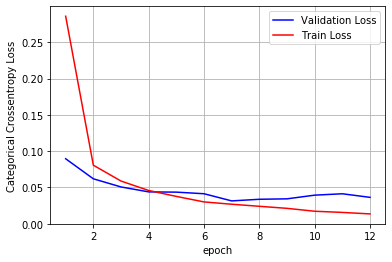

In [6]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Model 2-> 3 conv + 3 maxpoll+ 2 dense layers

In [7]:
import warnings
warnings.filterwarnings("ignore")
# go basic model to deep layer model
# Network Architecture
# input -> conv -> polling -> conv -> polling -> conv -> polling -> FC -> output
# 8 32 128 64
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.adam(),
metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
__________

In [8]:
import warnings
warnings.filterwarnings("ignore")
history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.3010 - acc: 0.9099 - val_loss: 0.1078 - val_acc: 0.9688
Epoch 2/12
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0905 - acc: 0.9723 - val_loss: 0.0926 - val_acc: 0.9704
Epoch 3/12
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0661 - acc: 0.9792 - val_loss: 0.0649 - val_acc: 0.9808
Epoch 4/12
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0511 - acc: 0.9837 - val_loss: 0.0608 - val_acc: 0.9807
Epoch 5/12
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0424 - acc: 0.9868 - val_loss: 0.0611 - val_acc: 0.9816
Epoch 6/12
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0358 - acc: 0.9887 - val_loss: 0.0476 - val_acc: 0.9858
Epoch 7/12
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0321 - acc: 0.9899 - val_loss: 0.0458 - val_acc

Train score: 0.012100143584344308
Train accuracy: 99.59166666666667

************************ *********************

Test score: 0.05412146498494658
Test accuracy: 98.75


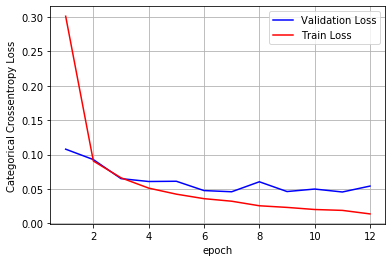

In [9]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Finally we train a model with the trend Conv-Conv-Pool-Conv-Conv-Pool

# Model 3 -> 4 conv+ 2 maxpoll + 2 dence

In [10]:
# go basic model to deep layer model
# Network Architecture
# input -> conv -> conv -> polling -> conv -> conv -> polling -> FC -> output
# 16 16 32 32 512
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(Conv2D(16,(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.adam(),
metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
__________

In [11]:
import warnings
warnings.filterwarnings("ignore")
history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 102s 2ms/step - loss: 0.1857 - acc: 0.9447 - val_loss: 0.0564 - val_acc: 0.9812
Epoch 2/12
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0472 - acc: 0.9855 - val_loss: 0.0418 - val_acc: 0.9864
Epoch 3/12
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0314 - acc: 0.9903 - val_loss: 0.0289 - val_acc: 0.9905
Epoch 4/12
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0231 - acc: 0.9926 - val_loss: 0.0319 - val_acc: 0.9890
Epoch 5/12
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0172 - acc: 0.9943 - val_loss: 0.0271 - val_acc: 0.9909
Epoch 6/12
60000/60000 [==============================] - 618s 10ms/step - loss: 0.0142 - acc: 0.9956 - val_loss: 0.0311 - val_acc: 0.9909
Epoch 7/12
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0122 - acc: 0.9960 - val_loss: 0.0371 - va

Train score: 0.008017680925130662
Train accuracy: 99.74333333333333

************************ *********************

Test score: 0.035289469616033374
Test accuracy: 99.09


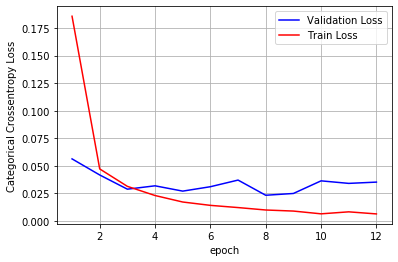

In [12]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


# Model 1-> 2 conv + 2 maxpoll+ 3 dense layer +Dropout (0.5)

In [13]:
#Same models with Dropouts
import warnings
warnings.filterwarnings("ignore")
# In this (First Model) lets follow the general structure of the lenet we will make a simple model
# Network Architecture
# input -> conv -> polling -> conv -> polling ->droupout-> FC -> FC -> output
# 8 16 120 84 10
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.adam(),
metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

W0822 20:24:07.094106  1320 deprecation.py:506] From C:\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 16)        3216      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 120)               48120     
__________

In [14]:
history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 31s 521us/step - loss: 0.4148 - acc: 0.8659 - val_loss: 0.0964 - val_acc: 0.9711
Epoch 2/12
60000/60000 [==============================] - 31s 516us/step - loss: 0.1344 - acc: 0.9582 - val_loss: 0.0558 - val_acc: 0.9816
Epoch 3/12
60000/60000 [==============================] - 30s 507us/step - loss: 0.1031 - acc: 0.9676 - val_loss: 0.0418 - val_acc: 0.9862
Epoch 4/12
60000/60000 [==============================] - 30s 508us/step - loss: 0.0873 - acc: 0.9731 - val_loss: 0.0376 - val_acc: 0.9866
Epoch 5/12
60000/60000 [==============================] - 30s 499us/step - loss: 0.0771 - acc: 0.9753 - val_loss: 0.0345 - val_acc: 0.9875
Epoch 6/12
60000/60000 [==============================] - 31s 509us/step - loss: 0.0713 - acc: 0.9780 - val_loss: 0.0326 - val_acc: 0.9886
Epoch 7/12
60000/60000 [==============================] - 30s 502us/step - loss: 0.0660 - acc: 0.9793 - val_loss: 0.

Train score: 0.015612688764524258
Train accuracy: 99.53

************************ *********************

Test score: 0.025816060557204763
Test accuracy: 99.22


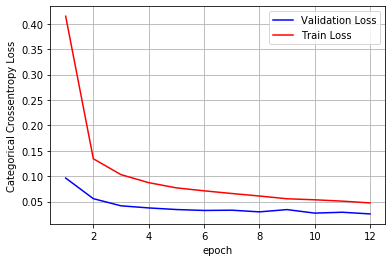

In [15]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


# Model 2-> 3 conv + 3 maxpoll+ 2 dense layers + Dropout (0.9)

In [16]:
import warnings
warnings.filterwarnings("ignore")
# go basic model to deep layer model
# Network Architecture
# input -> conv -> polling -> conv -> polling -> conv -> polling ->dropout-> FC -> output
# 8 32 128 64
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Dropout(0.9))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.adam(),
metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

W0822 20:30:38.725002  1320 nn_ops.py:4224] Large dropout rate: 0.9 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 1, 128)         0         
__________

In [17]:
history=model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1,
validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 64s 1ms/step - loss: 1.2593 - acc: 0.5415 - val_loss: 0.2457 - val_acc: 0.9450
Epoch 2/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.7342 - acc: 0.7326 - val_loss: 0.1495 - val_acc: 0.9600
Epoch 3/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.6122 - acc: 0.7760 - val_loss: 0.1151 - val_acc: 0.9683
Epoch 4/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.5505 - acc: 0.8000 - val_loss: 0.0934 - val_acc: 0.9736
Epoch 5/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.5010 - acc: 0.8188 - val_loss: 0.0850 - val_acc: 0.9754
Epoch 6/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.4635 - acc: 0.8331 - val_loss: 0.0811 - val_acc: 0.9762
Epoch 7/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.4433 - acc: 0.8416 - val_loss: 0.0809 - val_acc

In [18]:
keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)

# Model 3-> 4 conv + 2 maxpoll+ 2 dense layers + Dropout (0.3)

In [19]:

# go basic model to deep layer model
# Network Architecture
# input -> conv -> conv -> polling -> conv -> conv -> polling ->dropout-> FC -> output
# 16 16 32 32 512
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(Conv2D(16,(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.adam(),
metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 32)          0         
__________

In [20]:
history=model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1,
validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 105s 2ms/step - loss: 0.2071 - acc: 0.9358 - val_loss: 0.0434 - val_acc: 0.9860
Epoch 2/12
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0574 - acc: 0.9824 - val_loss: 0.0301 - val_acc: 0.9898
Epoch 3/12
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0417 - acc: 0.9864 - val_loss: 0.0305 - val_acc: 0.9902
Epoch 4/12
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0335 - acc: 0.9890 - val_loss: 0.0236 - val_acc: 0.9920
Epoch 5/12
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0264 - acc: 0.9913 - val_loss: 0.0227 - val_acc: 0.9921
Epoch 6/12
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0238 - acc: 0.9921 - val_loss: 0.0274 - val_acc: 0.9917
Epoch 7/12
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0206 - acc: 0.9934 - val_loss: 0.0287 - 

Train score: 0.006600003199334939
Train accuracy: 99.77666666666667

************************ *********************

Test score: 0.0280865813530756
Test accuracy: 99.21


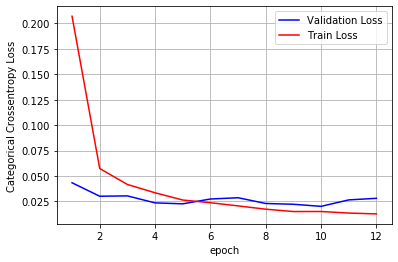

In [21]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# MLP + ReLU +SGD

In [35]:
from keras.initializers import RandomNormal
from keras.layers import Activation, Dense
from keras.initializers import RandomNormal
#from keras.utils.visualize_util import to_graph
from keras.models import Sequential

In [39]:
import warnings
warnings.filterwarnings("ignore")
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal
#from keras.utils.visualize_util import to_graph
from keras.models import Sequential
#to_graph(Sequential())

In [29]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [30]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [31]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d,%d)"%(X_test.shape[1], X_test.shape[2]))


Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28,28)


In [32]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
# after converting the input images from 3d to 2d vectors
print("Number of training examples :", X_train.shape[0], "and each image is of shape(%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape(784)
Number of training examples : 10000 and each image is of shape (784)


In [33]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255
X_train = X_train/255
X_test = X_test/255

In [40]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])
# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [41]:
# some model parameters
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 112
nb_epoch = 20
print(input_dim)

784


In [43]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_20 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [46]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.6941 - acc: 0.8031 - val_loss: 0.3673 - val_acc: 0.8982
Epoch 2/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.3322 - acc: 0.9054 - val_loss: 0.2906 - val_acc: 0.9160
Epoch 3/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.2754 - acc: 0.9218 - val_loss: 0.2532 - val_acc: 0.9261
Epoch 4/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.2426 - acc: 0.9308 - val_loss: 0.2306 - val_acc: 0.9325
Epoch 5/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.2193 - acc: 0.9381 - val_loss: 0.2141 - val_acc: 0.9378
Epoch 6/20
60000/60000 [==============================] - 7s 125us/step - loss: 0.2013 - acc: 0.9430 - val_loss: 0.1987 - val_acc: 0.9421
Epoch 7/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.1864 - acc: 0.9470 - val_loss: 0.1898 - 

Train score: 0.09366472623236477
Train accuracy: 97.47666666666667

************************ *********************

Test score: 0.11871300079077482
Test accuracy: 96.34


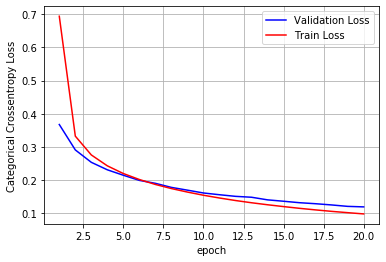

In [48]:
#Evaluate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)
#Train accuracy
score = model_relu.evaluate(X_train, Y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

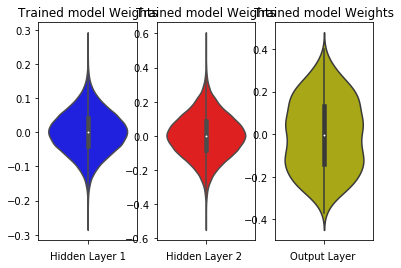

In [49]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")

ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP + ReLU + adam

In [59]:
# Multilayer perceptron
# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni).
# h1 => σ=√(2/(fan_in) = 0.062 => N(0,σ) = N(0,0.062)
# h2 => σ=√(2/(fan_in) = 0.125 => N(0,σ) = N(0,0.125)
# out => σ=√(2/(fan_in+1) = 0.120 => N(0,σ) = N(0,0.120)
model_relu = Sequential()
model_relu.add(Dense(610, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(420, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(210, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))
model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 610)               478850    
_________________________________________________________________
dense_23 (Dense)             (None, 420)               256620    
_________________________________________________________________
dense_24 (Dense)             (None, 210)               88410     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                2110      
Total params: 825,990
Trainable params: 825,990
Non-trainable params: 0
_________________________________________________________________


In [60]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 332us/step - loss: 0.2089 - acc: 0.9367 - val_loss: 0.1186 - val_acc: 0.9628
Epoch 2/20
60000/60000 [==============================] - 18s 296us/step - loss: 0.0774 - acc: 0.9760 - val_loss: 0.0833 - val_acc: 0.9712
Epoch 3/20
60000/60000 [==============================] - 17s 288us/step - loss: 0.0534 - acc: 0.9828 - val_loss: 0.0771 - val_acc: 0.9761
Epoch 4/20
60000/60000 [==============================] - 17s 285us/step - loss: 0.0382 - acc: 0.9875 - val_loss: 0.0848 - val_acc: 0.9758
Epoch 5/20
60000/60000 [==============================] - 17s 286us/step - loss: 0.0317 - acc: 0.9894 - val_loss: 0.0901 - val_acc: 0.9757: 0.0313 
Epoch 6/20
60000/60000 [==============================] - 17s 291us/step - loss: 0.0284 - acc: 0.9910 - val_loss: 0.1089 - val_acc: 0.9724
Epoch 7/20
60000/60000 [==============================] - 17s 287us/step - loss: 0.0242 - acc: 0.9918 - val

Train score: 0.008483383478405585
Train accuracy: 99.72666666666666

************************ *********************

Test score: 0.09776807529597008
Test accuracy: 98.08


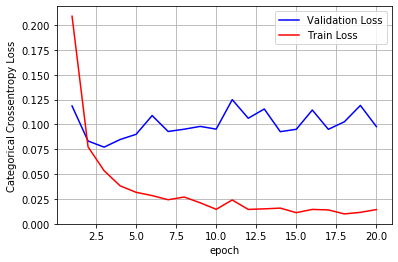

In [61]:
#Evualate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)
#Train accuracy
score = model_relu.evaluate(X_train, Y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Compare all the model results

In [58]:
from prettytable import PrettyTable
tb = PrettyTable()
tb.field_names= ("conv_layers", "MAxPoll_layers", "Dense_layers","Dropout","Accuracy")
tb.add_row(["2", "2","3","NO",98.94])
tb.add_row(["3", "3","2","NO",98.75])
tb.add_row(["4", "2","2","NO",99.09])
tb.add_row(["2", "2","3","0.5",99.22])
tb.add_row(["3", "3","2","0.9",97.92])
tb.add_row(["4", "2","2","0.3",99.21])

print(tb.get_string(titles = "CNN Models - Observations"))

+-------------+----------------+--------------+---------+----------+
| conv_layers | MAxPoll_layers | Dense_layers | Dropout | Accuracy |
+-------------+----------------+--------------+---------+----------+
|      2      |       2        |      3       |    NO   |  98.94   |
|      3      |       3        |      2       |    NO   |  98.75   |
|      4      |       2        |      2       |    NO   |  99.09   |
|      2      |       2        |      3       |   0.5   |  99.22   |
|      3      |       3        |      2       |   0.9   |  97.92   |
|      4      |       2        |      2       |   0.3   |  99.21   |
+-------------+----------------+--------------+---------+----------+


CONCLUSION:
    
Train accuracy is low for higher number of layers.

Test accuracy  is almost same for all case.

Overall conclusion:
We can conclude that all the 3 different architectures i.e 3, 5 and 9 performed very well with close accuracy of 98.7%.
Also, We can conclude that regularizers like drop out resulted in close accuracy of 99.4%

CONCLUSION FOR OPTIMIZERS:
Accuracy for Adam optimizer is little higher when compared with SGD optimizer